## Introduction

Customer churn represents one of the most critical challenges for subscription-based businesses.
This exploratory data analysis (EDA) aims to identify the key behavioral, contractual, and demographic factors
that influence customer churn in the telecom sector.

Rather than exploring every variable blindly, this analysis is driven by clear business questions.
The insights derived from this EDA will later support feature engineering and predictive modeling
to proactively reduce customer churn and improve retention strategies.

## Why Exploratory Data Analysis?

Exploratory Data Analysis is used in this project to:

- Identify patterns and trends related to customer churn  
- Validate assumptions about customer behavior  
- Highlight variables that are most relevant for churn prediction  
- Support data-driven business decisions

## Key Business Questions

This analysis focuses on the following core questions:

- What proportion of customers churned, and how significant is the churn problem?
- Does customer tenure influence the likelihood of churn?
- How does contract type relate to customer churn?
- Is pricing a major driver of churn behavior?
- Do usage patterns reflect customer satisfaction and retention?
- Do promotional offers and referrals reduce churn risk?
- Are there noticeable churn differences across demographic groups?

Each visualization and analysis in this notebook directly addresses one or more of these questions.
Insights are interpreted from a business perspective rather than purely statistical observations.

This notebook is structured around business-driven questions, with each section focusing on a specific factor influencing churn.


## Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
from IPython.core.display import HTML
HTML("""
<style>
.dataframe table, .dataframe th, .dataframe td { font-size: 12px; }
div.output_scroll { overflow-x: auto; }
</style>
""")

### Loading the Cleaned Dataset

The cleaned dataset prepared in the data cleaning phase is loaded for analysis.
This ensures consistency and avoids repeating preprocessing steps.

The cleaned dataset is used to ensure consistent column naming,
handled missing values, and validated data types before analysis.



In [2]:
df = pd.read_csv("../data/processed/cleaned_data.csv")

df.shape

(7043, 50)

## 1. Overall Churn Overview

This section provides a high-level view of customer churn.
Understanding the overall churn rate helps assess how serious the retention problem is
and sets the context for deeper analysis in later sections.


In [3]:
# Calculate churn distribution
churn_counts = df['churn_label'].value_counts()
churn_percent = df['churn_label'].value_counts(normalize=True) * 100

churn_summary = churn_percent.reset_index()
churn_summary.columns = ['churn_label', 'percentage']

churn_summary

,churn_label,percentage
0,No,73.463013
1,Yes,26.536987


The table below provides exact values for reference.

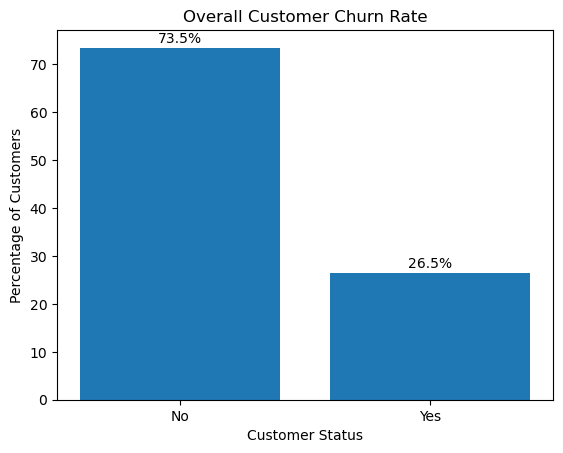

In [4]:
plt.figure()
plt.bar(churn_summary['churn_label'], churn_summary['percentage'])
plt.title('Overall Customer Churn Rate')
plt.xlabel('Customer Status')
plt.ylabel('Percentage of Customers')

for i, value in enumerate(churn_summary['percentage']):
    plt.text(i, value + 1, f"{value:.1f}%", ha='center')

plt.show()

### Insight

The overall churn rate indicates that 26.5% of customers have left the company.
This is a significant proportion, suggesting that customer retention is a key business challenge.
Further analysis is needed to understand which factors contribute most to churn and to develop effective retention strategies.


C:\Users\qusay\AppData\Local\Temp\ipykernel_7024\1036284646.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure_group = df.groupby(['tenure_group','churn_label']).size().unstack(fill_value=0)


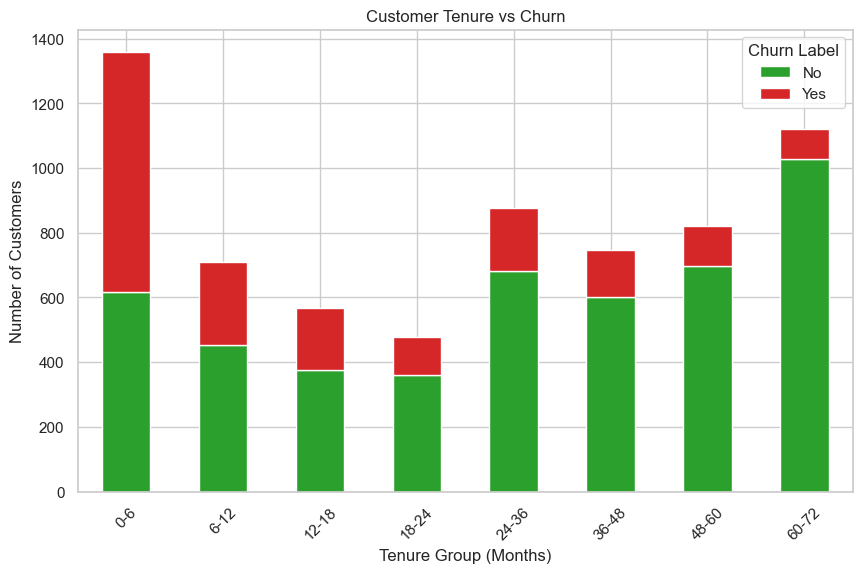

churn_label,No,Yes
tenure_group,,
0-6,616,744
6-12,454,255
12-18,377,191
18-24,361,118
24-36,683,193
36-48,602,146
48-60,697,123
60-72,1028,93


In [5]:
sns.set(style="whitegrid")

# Create tenure groups
bins = [0, 6, 12, 18, 24, 36, 48, 60, 72]
labels = ['0-6','6-12','12-18','18-24','24-36','36-48','48-60','60-72']
df['tenure_group'] = pd.cut(df['tenure_in_months'], bins=bins, labels=labels, right=False)

# Group by tenure group and churn_label
churn_by_tenure_group = df.groupby(['tenure_group','churn_label']).size().unstack(fill_value=0)

# Plot Stacked Bar
churn_by_tenure_group.plot(kind='bar', stacked=True, figsize=(10,6), color={'No':'#2ca02c', 'Yes':'#d62728'})

plt.title('Customer Tenure vs Churn')
plt.xlabel('Tenure Group (Months)')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Churn Label')
plt.show()

# display the table for reference
churn_by_tenure_group

The table below provides exact values for reference.

### Insight: Tenure vs Churn

The analysis shows that **customer churn is highest during the first 6 months of subscription**, with more than half of the new customers leaving.  
After the first year, churn decreases significantly, indicating that customers who stay beyond 12-24 months are much more likely to remain loyal.  
Long-term customers (5-6 years) exhibit a very low churn rate, highlighting the importance of **retention efforts focused on new customers**.  

Actionable insight:  
- Implement targeted retention strategies for customers in their **first 6-12 months** to reduce early churn.
- Monitor engagement and satisfaction closely during this critical period.


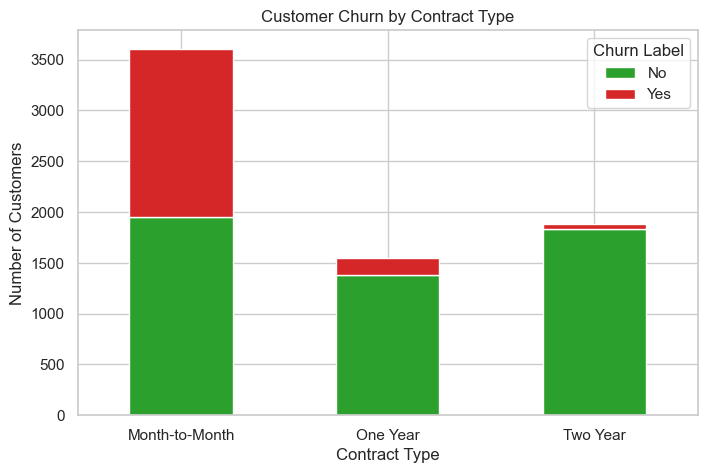

churn_label,No,Yes
contract,,
Month-to-Month,1955,1655
One Year,1384,166
Two Year,1835,48


In [6]:
# Group by contract type and churn_label
contract_churn = df.groupby(['contract','churn_label']).size().unstack(fill_value=0)

# Plot Stacked Bar
contract_churn.plot(kind='bar', stacked=True, figsize=(8,5), color={'No':'#2ca02c', 'Yes':'#d62728'})

plt.title('Customer Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Churn Label')
plt.show()

# display table for reference
contract_churn

The table below provides exact values for reference.

### Insight: Contract Type vs Churn

The analysis shows that **Month-to-Month customers are at the highest risk of churn**, with nearly half leaving the service.  
One-Year contracts significantly reduce churn, while Two-Year contracts show the **lowest churn rate**, indicating that longer commitments foster customer loyalty.  

Actionable insight:  
- Encourage new customers to opt for **longer-term contracts** through incentives or discounts.  
- Monitor Month-to-Month customers closely and implement **retention strategies** (e.g., offers, engagement campaigns) to reduce early churn.


C:\Users\qusay\AppData\Local\Temp\ipykernel_7024\2319123823.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn_label', y='monthly_charge', data=df, palette={'No':'#2ca02c', 'Yes':'#d62728'})


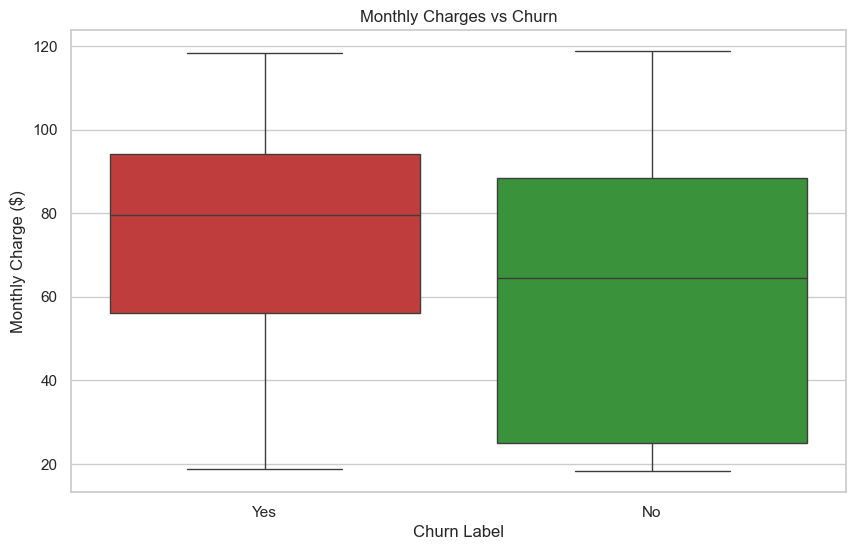

,count,mean,std,min,25%,50%,75%,max
churn_label,,,,,,,,
No,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
Yes,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


In [7]:
# Plot Monthly Charges vs Churn
plt.figure(figsize=(10,6))
sns.boxplot(x='churn_label', y='monthly_charge', data=df, palette={'No':'#2ca02c', 'Yes':'#d62728'})
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn Label')
plt.ylabel('Monthly Charge ($)')
plt.show()

# descriptive statistics
monthly_charges_stats = df.groupby('churn_label')['monthly_charge'].describe()
monthly_charges_stats


The table below provides exact values for reference.

### Insight: Monthly Charges vs Churn

Customers who churn tend to have **higher monthly charges** compared to those who stay.  
The average monthly charge for churned customers is $74.44, while it is $61.27 for retained customers.  
The median value also confirms this pattern, indicating that **higher billing is a significant factor in churn risk**.

Actionable insight:  
- Consider targeted retention strategies for customers with higher monthly charges, such as **custom offers, discounts, or value-added services**.  
- Monitor high-billing customers closely during engagement campaigns to reduce churn.


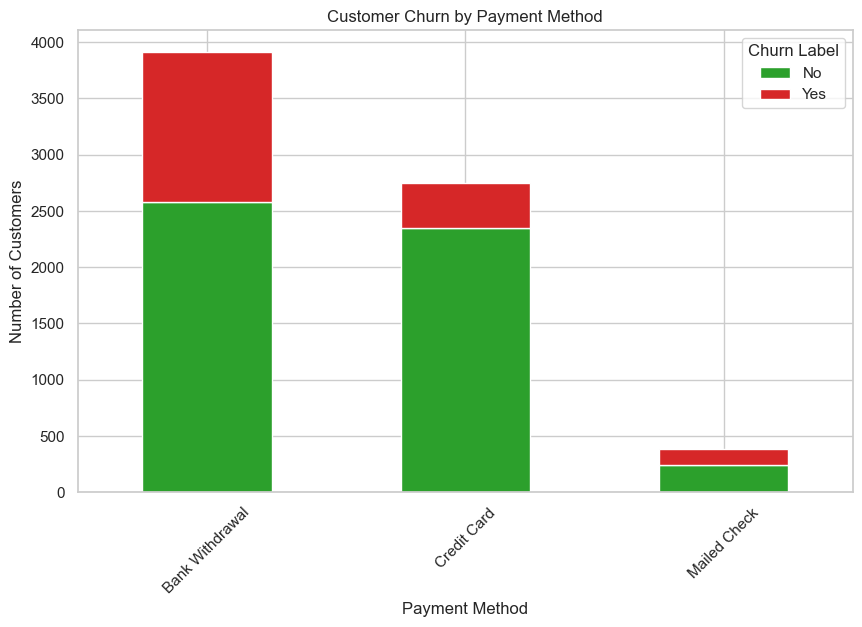

churn_label,No,Yes
payment_method,,
Bank Withdrawal,2580,1329
Credit Card,2351,398
Mailed Check,243,142


In [8]:
# Group by payment method and churn_label
payment_churn = df.groupby(['payment_method','churn_label']).size().unstack(fill_value=0)

# Plot Stacked Bar
payment_churn.plot(kind='bar', stacked=True, figsize=(10,6), color={'No':'#2ca02c', 'Yes':'#d62728'})

plt.title('Customer Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Churn Label')
plt.show()

# display table for reference
payment_churn


The table below provides exact values for reference.

### Insight: Payment Method vs Churn

The analysis indicates that **customers paying via Credit Card have the lowest churn rate (~14.5%)**, suggesting higher loyalty among digital payment users.  
Bank Withdrawals show a moderate churn rate (34%), while Mailed Check users have the highest risk (36%).  

Actionable insight:  
- Encourage digital payments (Credit Card, Automatic Billing) to reduce churn.  
- Monitor Bank Withdrawal and Mailed Check customers closely, and consider incentives or reminders to improve retention.  
- Payment method is a clear factor to target in retention campaigns.


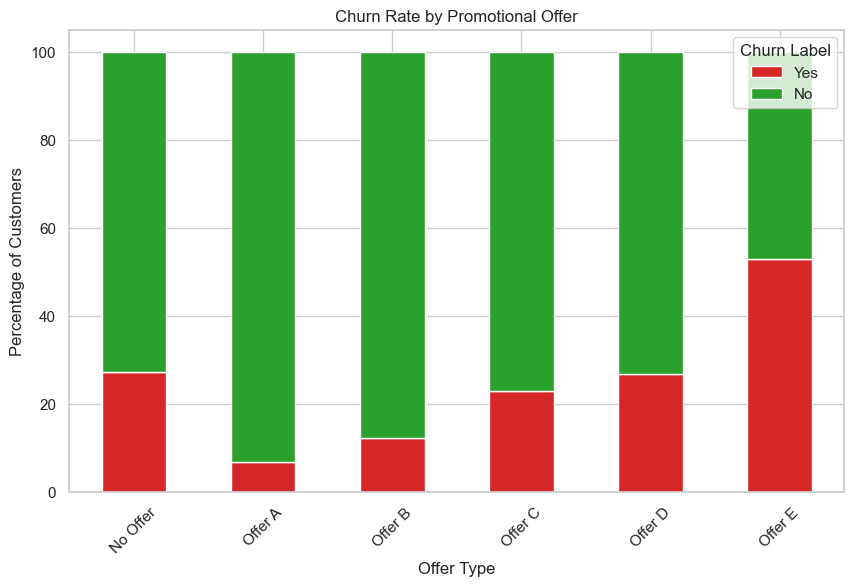

churn_label,No,Yes
offer,,
No Offer,72.891411,27.108589
Offer A,93.269231,6.730769
Offer B,87.742718,12.257282
Offer C,77.108434,22.891566
Offer D,73.255814,26.744186
Offer E,47.080745,52.919255


In [9]:
# Group by offer and churn_label
offer_churn = df.groupby('offer')['churn_label'].value_counts(normalize=True).unstack().fillna(0)*100

# Plot
offer_churn[['Yes','No']].plot(kind='bar', stacked=True, figsize=(10,6), color={'No':'#2ca02c','Yes':'#d62728'})
plt.title('Churn Rate by Promotional Offer')
plt.xlabel('Offer Type')
plt.ylabel('Percentage of Customers')
plt.xticks(rotation=45)
plt.legend(title='Churn Label')
plt.show()

# Display table
offer_churn


The table below provides exact values for reference.

### Insight: Churn Rate by Promotional Offer

The analysis shows that **Offer A and Offer B are highly effective**, with churn rates of only 6.7% and 12.3%, respectively.  
Customers without any offer (No Offer) have a higher churn rate of 27.1%, while Offer E is associated with the **highest churn (52.9%)**, indicating low effectiveness or targeting less loyal customers.

Actionable insight:  
- Focus on promoting effective offers (A and B) to new and at-risk customers.  
- Reevaluate Offer E to understand why it correlates with high churn, and consider modifying or discontinuing it.  
- Using targeted promotions can significantly reduce churn and improve retention.


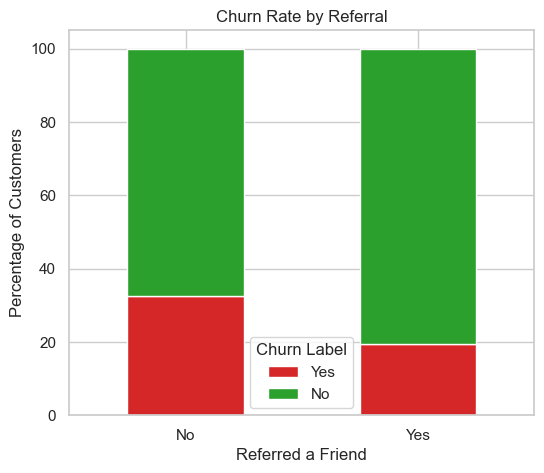

churn_label,No,Yes
referred_a_friend,,
No,67.416907,32.583093
Yes,80.633147,19.366853


In [10]:
# Group by referred_a_friend and churn_label
referral_churn = df.groupby('referred_a_friend')['churn_label'].value_counts(normalize=True).unstack().fillna(0)*100

# Plot
referral_churn[['Yes','No']].plot(kind='bar', stacked=True, figsize=(6,5), color={'No':'#2ca02c','Yes':'#d62728'})
plt.title('Churn Rate by Referral')
plt.xlabel('Referred a Friend')
plt.ylabel('Percentage of Customers')
plt.xticks(rotation=0)
plt.legend(title='Churn Label')
plt.show()

# Display table
referral_churn


The table below provides exact values for reference.

### Insight: Churn Rate by Referral

The analysis indicates that **customers who referred friends have a lower churn rate (19.4%)** compared to those who did not refer friends (32.6%).  
This suggests that referral behavior is associated with higher customer loyalty.

Actionable insight:  
- Encourage referral programs to increase engagement and retention.  
- Target customers who have not referred friends with special campaigns to incentivize referrals.  
- Social engagement can be a key driver to reduce churn.


### This section analyzes demographic attributes to assess whether churn behavior varies across customer groups.

Churn rate by gender:
 churn_label         No        Yes
gender                           
Female       73.079128  26.920872
Male         73.839662  26.160338 



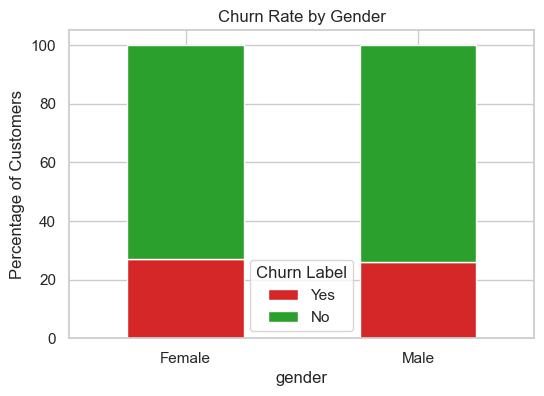

Churn rate by under_30:
 churn_label         No        Yes
under_30                         
No           72.261609  27.738391
Yes          78.301213  21.698787 



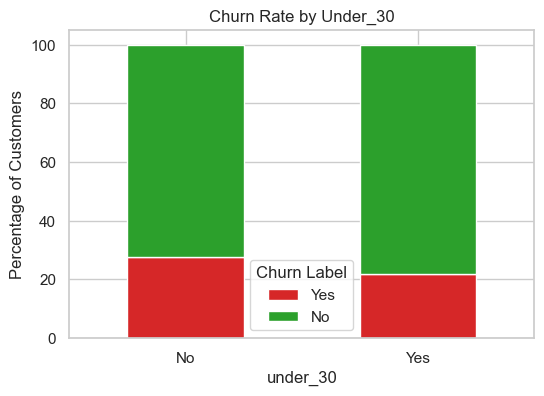

Churn rate by senior_citizen:
 churn_label            No        Yes
senior_citizen                      
No              76.393832  23.606168
Yes             58.318739  41.681261 



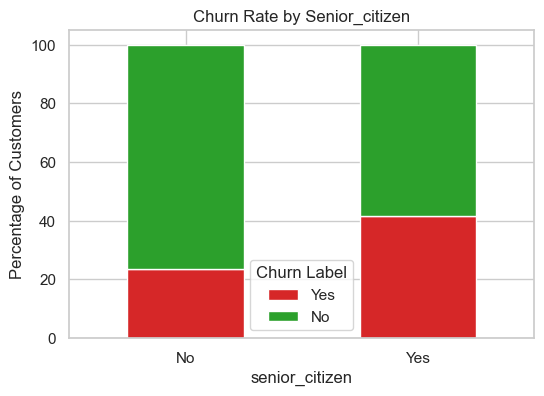

Churn rate by married:
 churn_label         No        Yes
married                          
No           67.042021  32.957979
Yes          80.335097  19.664903 



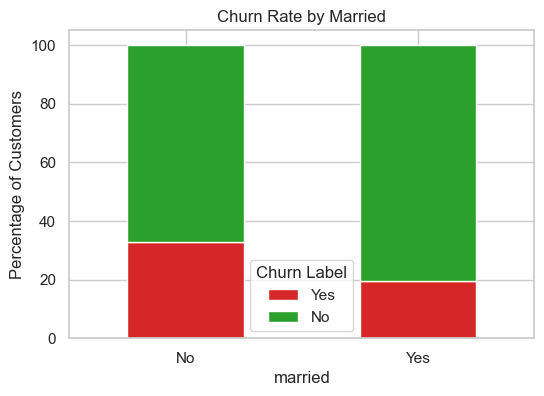

Churn rate by dependents:
 churn_label         No        Yes
dependents                       
No           67.448301  32.551699
Yes          93.484942   6.515058 



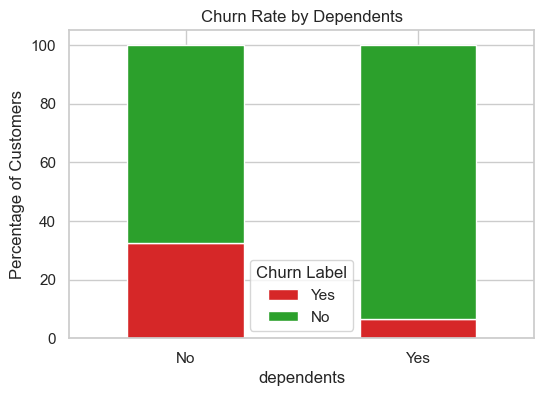

In [11]:
# List of demographic columns
demo_cols = ['gender', 'under_30', 'senior_citizen', 'married', 'dependents']

# Calculate Churn % for each demographic column
for col in demo_cols:
    demo_churn = df.groupby(col)['churn_label'].value_counts(normalize=True).unstack().fillna(0)*100
    print(f"Churn rate by {col}:\n", demo_churn, "\n")
    # Plot
    demo_churn[['Yes','No']].plot(kind='bar', stacked=True, figsize=(6,4), color={'No':'#2ca02c','Yes':'#d62728'})
    plt.title(f'Churn Rate by {col.capitalize()}')
    plt.ylabel('Percentage of Customers')
    plt.xticks(rotation=0)
    plt.legend(title='Churn Label')
    plt.show()


### Insight: Demographic Factors vs Churn

- **Gender**: No significant difference; both male and female customers have similar churn rates (~26%).
- **Age (Under 30)**: Customers under 30 are less likely to churn (21.7%) compared to older customers (27.7%).
- **Senior Citizens**: High churn rate (41.7%), indicating that older customers may require targeted retention efforts.
- **Married**: Married customers are more loyal (19.7% churn) than single customers (33% churn).
- **Dependents**: Customers with dependents have the lowest churn (6.5%), showing strong retention among those with family obligations.

Actionable insight:  
- Implement targeted retention strategies for senior citizens and single customers.  
- Recognize that younger, married, and customers with dependents are generally more loyal.  
- Demographic factors can guide personalized offers and engagement campaigns.


## Executive Summary

- Overall churn rate stands at approximately 26.5%, indicating a moderate retention challenge.
- Customers with short tenure and month-to-month contracts are the most likely to churn.
- Higher monthly charges correlate strongly with increased churn.
- Value-added services and promotional mechanisms show a strong association with reduced churn.
- Promotional offers and referral programs improve customer retention.
- Senior citizens, unmarried customers, and those without dependents show higher churn risk.

These insights highlight clear opportunities for targeted retention strategies and informed pricing decisions.
